In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from urllib.parse import unquote
from tqdm import tqdm 

dataFolder = '../Data/wikispeedia_paths-and-graph/'
articlesDf = pd.read_csv(dataFolder+ 'articles.tsv')
articlesDf = articlesDf.iloc[10:]
articlesSeries  = pd.Series(articlesDf.index.map(lambda x : x[0])).map(lambda y : unquote(y,'utf-8'))
#articlesSeries.head(10)

linksDf = pd.read_csv(dataFolder + 'links.tsv', header=11, sep = '\t')
linksDf.columns = ['Elements','links']
linksDf['Elements'] = linksDf['Elements'].map(lambda x : unquote(x, 'utf-8'))
linksDf['links'] = linksDf['links'].map(lambda x : unquote(x, 'utf-8'))
#linksDf.reset_index()

categoriesDf = pd.read_csv(dataFolder + 'categories.tsv', header=11, sep= '\t')
categoriesDf.index = categoriesDf.index.map(lambda x : unquote(x,'utf-8'))
categoriesDf.columns = ['categories']
#categoriesDf

paths_finishedDf= pd.read_csv(dataFolder + 'paths_finished.tsv', header=15, sep= '\t')
paths_finishedDf.columns = ['hashedIpAddress',   'timestamp',   'durationInSec',  'path',  'rating']
#paths_finishedDf

paths_unfinishedDf= pd.read_csv(dataFolder + 'paths_unfinished.tsv', header=16, sep= '\t')
paths_unfinishedDf.columns = ['hashedIpAddress',   'timestamp',   'durationInSec',  'path',  'target', 'type']
#paths_unfinishedDf

people_skin_color = pd.read_csv(dataFolder + 'people_with_skin_color.tsv', header=1, sep= '\t' )
people_skin_color.columns = ['Category', 'People', 'Skin Color']
people_skin_color['People'] = people_skin_color['People'].map(lambda x : unquote(x, 'utf-8'))
people_skin_color.reset_index()
#people_skin_color

,index,Category,People,Skin Color
0,0,subject.People.Historical_figures,Óengus I of the Picts,Blanc
1,1,subject.People.Historical_figures,Abbas I of Persia,Peau plus foncée
2,2,subject.People.Historical_figures,Adam Smith,Blanc
3,3,subject.People.Historical_figures,Adriaen van der Donck,Blanc
4,4,subject.People.Historical_figures,Agamemnon,Blanc
...,...,...,...,...
706,706,subject.People.Computing_People,Jimmy Wales,Blanc
707,707,subject.People.Computing_People,Linus Torvalds,Blanc
708,708,subject.People.Computing_People,Richard Stallman,Blanc
709,709,subject.People.Computing_People,Tim Berners-Lee,Blanc


1. Distribution of articles in each categories 


The dataset 'categories' contains main categories and then sub-categories. We will focus on main categories.

In [4]:
categories_details = categoriesDf["categories"].str.split(".", expand=True)

#keep only the main category
categories = categories_details[1]
categories = pd.DataFrame(categories)
categories = categories.rename(columns = {1 : 'Main Categories'})
categories_distribution=categories['Main Categories'].value_counts()


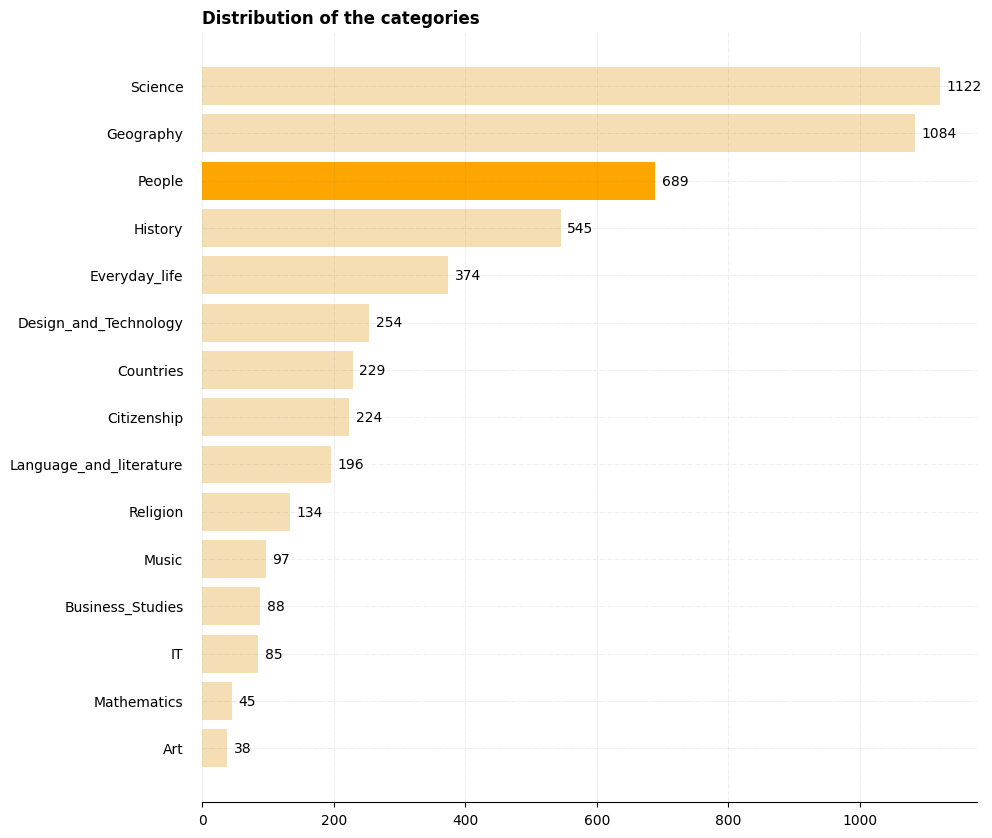

In [5]:
fig, ax = plt.subplots(figsize =(10, 10))
colors = ['wheat' if cat != 'People' else 'orange' for cat in categories_distribution.index]
ax.barh(categories_distribution.index, categories_distribution, color=colors)
 
# Remove axes splines
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove y Tick
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid( color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
 
# Show top values 
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width() +10, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10)

ax.set_title('Distribution of the categories', loc='left', fontweight= 'bold')

plt.show()

People is the third category containing the bigger amount of articles (around 700 articles). We will know focus on this category and used our new dataset 'people_with_skin_color.tsv'

2. The ethnics distribution whitin people articles

To continue, we will focus on the ethnics distribution whithin the people articles. 

In [6]:
people_color =  pd.concat([people_skin_color, people_skin_color['Category'].str.split(".", expand=True)], axis=1)
people_color = people_color.drop(columns = ['Category', 0, 1])
people_color = people_color.rename(columns = {1 : 'Categories'})

unique_color=people_color['Skin Color'].unique()
rename = {
    'Blanc' : 'White',
    'Peau plus foncée' : 'Black',
    'Peau brune' : 'Black',
    'Peau plus foncée (Aborigène australien)' : 'Black',
    'Peau plus foncée (Asiatique)' : 'East Asian', 
    'Peau plus foncée (Moyen-Orient)' : 'Arab',
    'Peau plus foncée (Polynésien)' : 'Polynesian',
    'Peau plus foncée (Sherpa/Népalais)' : 'South Asian', 
    'Peau plus foncée (Ascendance africaine partielle)' : 'Black', 
    'Peau plus foncée (Indien)' : 'South Asian',
    'Peau plus foncée (Berbère)' : 'Arab',
    'Peau plus foncée (Arabe)' : 'Arab',
    'Peau plus foncée (Tibétain)' : 'East Asian',
    'Peau plus foncée (Persan)' : 'Arab',
    'Peau plus foncée (Juif)' : 'Arab', 
    'Peau plus foncée (Somalienne)' : 'Black', 
    'Peau plus foncée (Mixte)' : 'Black',
    'Peau plus foncée (Hispanique)' : 'Hispanic', 
    'Peau plus foncée (Indonésien)' : 'East Asian', 
    'Peau plus foncée (Japonais)' : 'East Asian',
    'Peau plus foncée (Vietnamien)' : 'East Asian', 
    'Peau plus foncée (Indienne)' : 'South Asian', 
    'Peau brune (Indien)' : 'South Asian',
    'Peau plus foncée (Palestinien)' : 'Arab',
    'Peau brune (Pakistano-Indien)' : 'South Asian', 
    "Blanc (D'origine libanaise)": 'White', 
    'Peau plus foncée (Brésilien)' : 'Hispanic'
}
people_color['Skin Color'] = people_color['Skin Color'].replace(rename)
people_color_dist=people_color['Skin Color'].value_counts()




/var/folders/qv/jxqksgr511n2kd5_v801s5vc0000gn/T/ipykernel_76002/3028849050.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  people_dist_order = [people_color_dist[0], people_color_dist[6],people_color_dist[1],
/var/folders/qv/jxqksgr511n2kd5_v801s5vc0000gn/T/ipykernel_76002/3028849050.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  people_color_dist[5],people_color_dist[2],people_color_dist[4],
/var/folders/qv/jxqksgr511n2kd5_v801s5vc0000gn/T/ipykernel_76002/3028849050.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as 

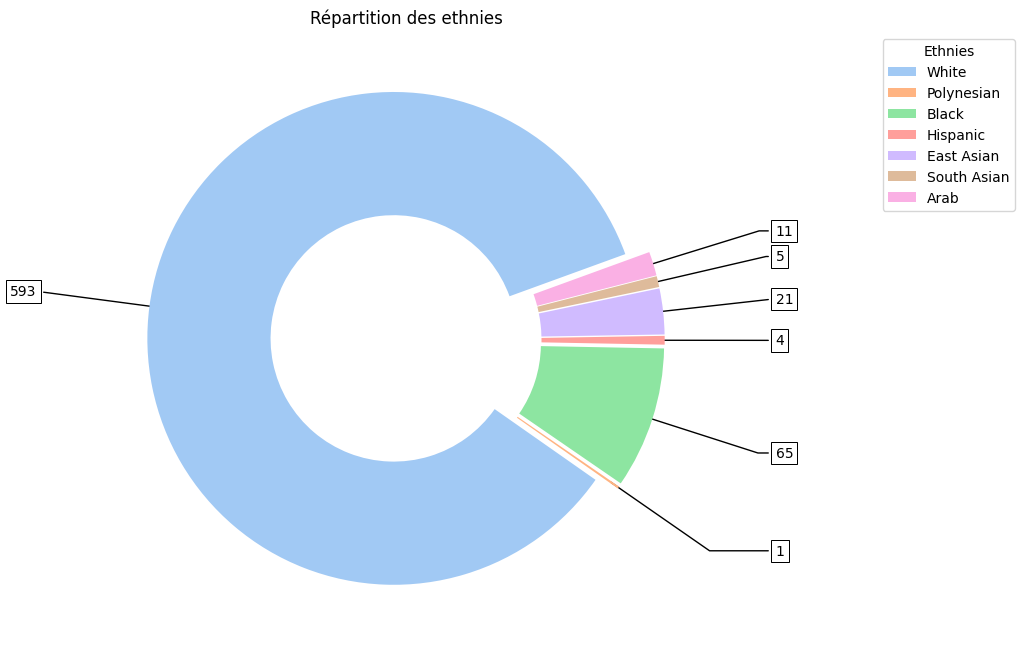

In [7]:
#Vizualise the data
labels2 = 'White', 'Polynesian', 'Black', 'Hispanic', 'East Asian', 'South Asian', 'Arab'
people_dist_order = [people_color_dist[0], people_color_dist[6],people_color_dist[1],
                     people_color_dist[5],people_color_dist[2],people_color_dist[4],
                     people_color_dist[3]]

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect='equal'))

wedges, texts = ax.pie(people_dist_order , wedgeprops=dict(width=0.5), startangle=20, explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], colors=sns.color_palette("pastel"))


bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(people_dist_order[i], xy=(x, y), xytext=(1.5*np.sign(x), 1.5*y),
                horizontalalignment=horizontalalignment, **kw)
ax.legend(wedges,labels2, title="Ethnies",bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Répartition des ethnies')
plt.show()

So the distribution of white people is way more bigger than the representation of the other ethnics groups. Wikispeedia contains more article about white personalities. This already show the inequal representation of the different ethnics groups within the game.

3. Extract the pathways where people are the final target 

So, we will look closely to the pathways where the target articles is a white people.

In [8]:
#Create a dataframe with the path decompose (each cells represents one article of the paths)
path =  paths_finishedDf['path'].str.split(";", expand=True)

#creat a dataframe containing only the people name
people_name= people_color['People']

In [9]:
#Find the index of the pathway that used at least one article categories in People
liste_index=[]
for index, row in tqdm(path.iterrows()):
    for col in path.columns:
        cell_value = row[col]
        if cell_value in people_name.tolist():
            liste_index.append(index)

#Only keep unique index
liste_index[:] = list(set(liste_index))

#Only keep the line of the dataframe path_finished.tsv that contains People's article
people_path = path.loc[liste_index]

51317it [03:26, 248.81it/s]


In [10]:
# Find all the path containing a people as final target and exctrant the starting article corresponding to it 
people_target_finish = []
index_target = []

start_finish= []

for index, row in tqdm(people_path.iterrows()):
    no_none_value = [value for value in row if value != None]
    if no_none_value[-1] in people_name.tolist() :
        people_target_finish.append(no_none_value[-1])
        index_target.append(index)
        start_finish.append(no_none_value[0])


print(people_target_finish)
print(index_target)
print(start_finish)

2330it [00:00, 21576.50it/s]

['Hirohito', 'Jesus', 'Shaka', 'Raphael', 'Aristotle', 'Jesus', 'Jesus', 'Charlemagne', 'Confucius', 'Confucius', 'Jesus', 'Confucius', 'Muhammad', 'Muhammad', 'Muhammad', 'Muhammad', 'Aristotle', 'Thrasybulus', 'Socrates', 'Hippocrates', 'Hippocrates', 'Socrates', 'Jesus', 'Jesus', 'Augustus', 'Voltaire', 'Jesus', 'Jesus', 'Jesus', 'Jesus', 'Jesus', 'Jesus', 'Jesus', 'Jesus', 'Jesus', 'Jesus', 'Jesus', 'Jesus', 'Jesus', 'Jesus', 'Jesus', 'Jesus', 'Jesus', 'Socrates', 'Timur', 'Hippocrates', 'Charlemagne', 'Euclid', 'Euclid', 'Euclid', 'Agamemnon', 'Heraclius', 'Helen', 'Heraclius', 'Jesus', 'Saladin', 'Saladin', 'Jesus', 'Euclid', 'Aristotle', 'Aristotle', 'Aristotle', 'Claudius', 'Augustus', 'Homer', 'Alcibiades', 'Agamemnon', 'Claudius', 'Socrates', 'Buddha', 'Michelangelo', 'Muhammad', 'Muhammad', 'Pythagoras', 'Pythagoras', 'Pythagoras', 'Columba', 'Augustus', 'H.D.', 'Euclid', 'Euclid', 'Pericles', 'Socrates', 'Socrates', 'Socrates', 'Socrates', 'Socrates', 'Zoroaster', 'Charlema

In [11]:
white_people = people_color[people_color['Skin Color'] == 'White']['People'].tolist()
arab_people = people_color[people_color['Skin Color'] == 'Arab']['People'].tolist()
black_people = people_color[people_color['Skin Color'] == 'Black']['People'].tolist()
east_asian_people = people_color[people_color['Skin Color'] == 'East Asian']['People'].tolist()

white_index =[]
arab_index =[]
black_index =[]
east_asian_index =[]

for i in range(0, len(index_target)):
    if people_target_finish[i] in white_people :
        white_index.append(index_target[i])

    if people_target_finish[i] in east_asian_people :
        east_asian_index.append(index_target[i])

    if people_target_finish[i] in arab_people:
        arab_index.append(index_target[i])

    if people_target_finish[i] in black_people :
        black_index.append(index_target[i])


In [12]:
#Count how many times each people are target
people_target_count = pd.Series(people_target_finish).value_counts().reset_index()
people_target_count.columns =['People', 'Count']

#Merge with the original color_people dataframe to have the informations on the ethnicity and category
people_target_df = people_target_count.merge(people_color)
people_target_df

,People,Count,Skin Color,2
0,Jesus,197,Arab,Religious_figures_and_leaders
1,Socrates,46,White,Philosophers
2,Muhammad,43,Arab,Religious_figures_and_leaders
3,Buddha,33,East Asian,Religious_figures_and_leaders
4,Aristotle,31,White,Philosophers
5,Confucius,28,East Asian,Philosophers
6,Hippocrates,25,White,Human_Scientists
7,Plato,22,White,Philosophers
8,Pythagoras,20,White,Mathematicians
9,Agamemnon,19,White,Historical_figures


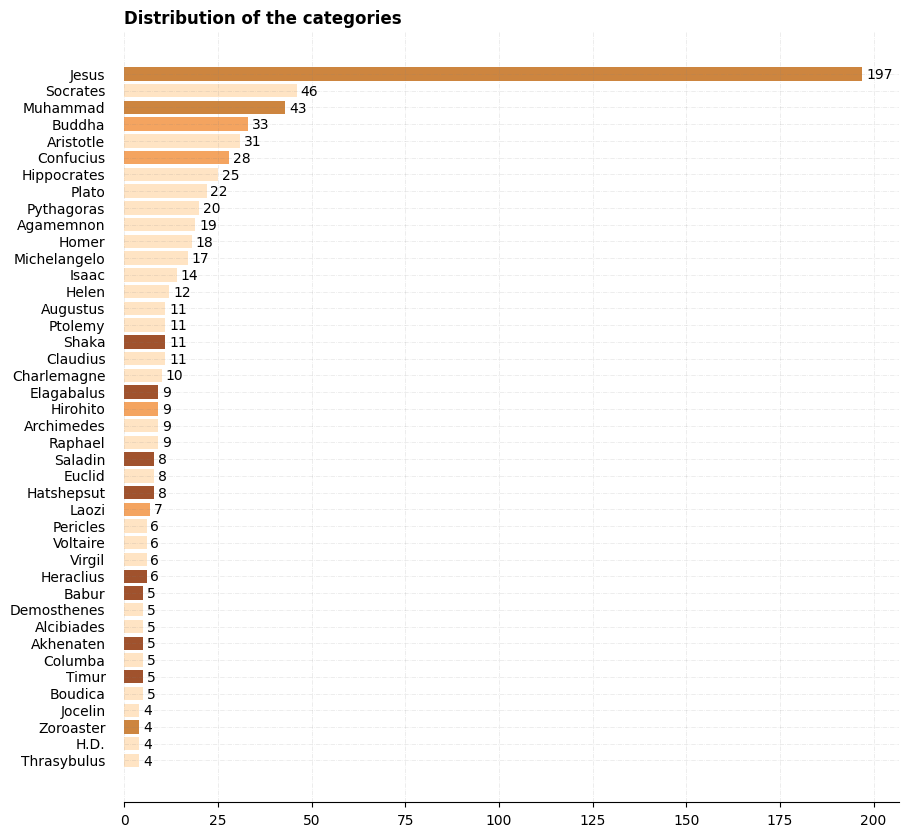

In [13]:
fig, ax = plt.subplots(figsize =(10, 10))
couleur = ['peru' if ethnic == 'Arab' else 'sienna' if  ethnic == 'Black' else 'sandybrown' if ethnic == 'East Asian' 
           else 'bisque' for ethnic in people_target_df['Skin Color']]
ax.barh(people_target_df['People'], people_target_df['Count'], color= couleur)
 
# Remove axes splines
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove y Tick
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid( color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
 
# Show top values 
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+1, i.get_y()+0.7, 
             str(round((i.get_width()), 2)),
             fontsize = 10)

ax.set_title('Distribution of the categories', loc='left', fontweight= 'bold')

plt.show()

So we clearly see, that white people dominate the target of the game with in second positions black people and then east asian an arab people. Some ethnics groups are not even represented in the target such as south east people. One person is highly target it is Jesus.  
ATTENTION ERREUR : EXEMPLE ADOLF HILTER N'APPARAIT PAS ALORS QU'IL EST LE TARGET DE BCP DE PARTIE

4. Study of the difficulty depending on the ethnics groups of the target

In [14]:
#Create dataframe containing the games informations for each ethnics groups target
target_white_path = paths_finishedDf.loc[white_index]
target_arab_path = paths_finishedDf.loc[arab_index]
target_black_path = paths_finishedDf.loc[black_index]
target_eastasian_path = paths_finishedDf.loc[east_asian_index]



In [15]:
#Mean difficulty (rated by the players)
white_mean_diff = target_white_path['rating'].mean(skipna = True)
arab_mean_diff = target_arab_path['rating'].mean(skipna = True)
black_mean_diff = target_black_path['rating'].mean(skipna = True)
eastasian_mean_diff = target_eastasian_path['rating'].mean(skipna = True)

print(white_mean_diff)
print(arab_mean_diff)
print(black_mean_diff)
print(eastasian_mean_diff)

2.31924882629108
1.8130081300813008
2.5675675675675675
2.0


Looking at this first estimation, it is difficult to say if white people target's path are less difficult than the others. Indeed, path with for target black people seems the more difficult whereas the one targeting arab people are the easier. So those results can't lead to a conclusion.

In [16]:
#Mean duration time for the different ethnics groups target
white_mean_duration= target_white_path['durationInSec'].mean(skipna = True)
arab_mean_duration = target_arab_path['durationInSec'].mean(skipna = True)
black_mean_duration = target_black_path['durationInSec'].mean(skipna = True)
eastasian_mean_duration = target_eastasian_path['durationInSec'].mean(skipna = True)

print(white_mean_duration)
print(arab_mean_duration)
print(black_mean_duration)
print(eastasian_mean_duration)

164.2274052478134
93.32377049180327
152.98245614035088
136.3116883116883


The mean duration of the games shows thats the shortest games are the one where arab people are target. This result is consistent with the previous computation of mean difficulty, even if it was quite unexpected. It is difficult to draw conclusions from the other results.

A good way to compare the difficulty between the different pathway would be to compare the victory and the defeat games. 

In [17]:
unfinished_target_people = paths_unfinishedDf[paths_unfinishedDf['target'].isin(people_name)]

index_target_unfinish = unfinished_target_people.index
target_unfinish = unfinished_target_people['target']
print(target_unfinish)

unfinish = unfinished_target_people['target'].value_counts().reset_index()
unfinish.columns = ['People', 'Count']

#Merge with the original color_people dataframe to have the informations on the ethnicity and category
people_target_unfinish = unfinish.merge(people_color)


83        Archimedes
338            Isaac
481          Boudica
498      Hippocrates
758          Boudica
            ...     
24114          Jesus
24338     Archimedes
24423    Hippocrates
24425        Boudica
24433       Muhammad
Name: target, Length: 206, dtype: object


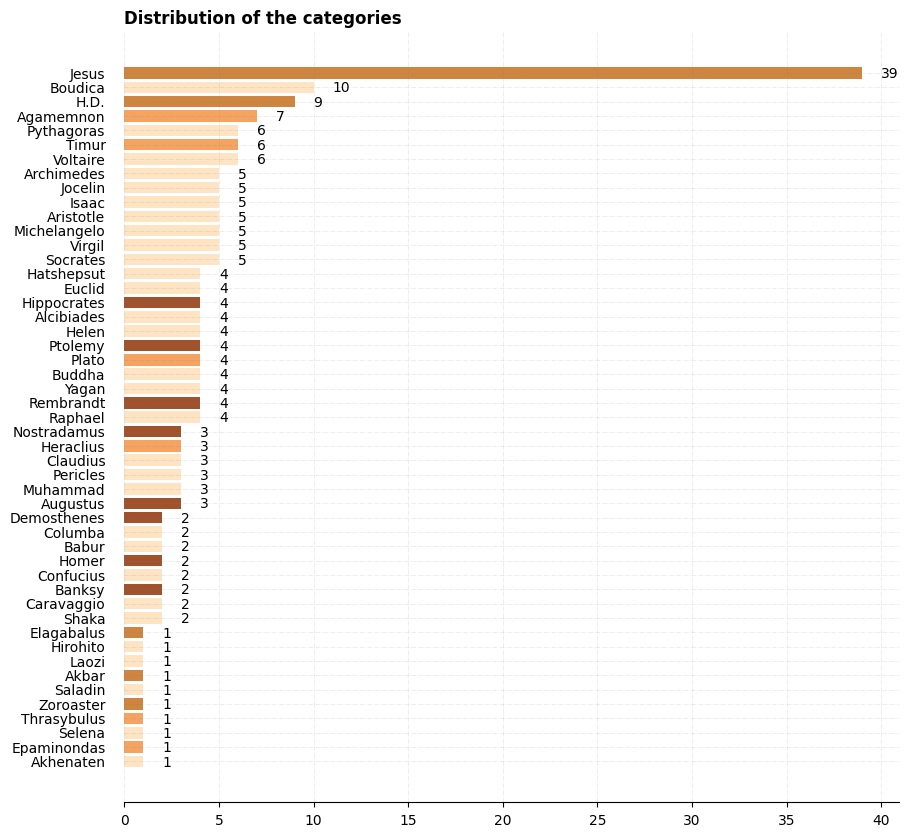

In [18]:
fig, ax = plt.subplots(figsize =(10, 10))
couleur = ['peru' if ethnic == 'Arab' else 'sienna' if  ethnic == 'Black' else 'sandybrown' if ethnic == 'East Asian' 
           else 'bisque' for ethnic in people_target_df['Skin Color']]
ax.barh(people_target_unfinish['People'], people_target_unfinish['Count'], color= couleur)
 
# Remove axes splines
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove y Tick
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid( color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
 
# Show top values 
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+1, i.get_y()+0.75, 
             str(round((i.get_width()), 2)),
             fontsize = 10)

ax.set_title('Distribution of the categories', loc='left', fontweight= 'bold')

plt.show()

So the distribution is quite the same for victory and defeat. Indeed, few more names appears for black people in the defeat. So at first sight the ethnicity does not seems to impact the finality of the games. But, this is just superficial result, we need to go further in details and in statistics test to take conclusion.

There are some CONFOUNDERS that can affect the finality of the games to victory or defeat : 
- players skills 
- distance from the optimum pathways
- difficulty of the propose games  

We need to fixed those confounders to compute a better analysis.  

1st possibility : Compare path with the same beginning article and target article in paths_finished and paths_unfinished. 

2nd possibility : Compare only the pathways realised by the same player and with the same lenght. 

In [19]:
#Create a dataframe with the path unfinished decompose (each cells represents one article of the paths)
path_unfinished=  paths_unfinishedDf['path'].str.split(";", expand=True)

#Find the index of the pathway that used at least one article categories in People
liste_index2=[]
for index, row in tqdm(path_unfinished.iterrows()):
    for col in path_unfinished.columns:
        cell_value = row[col]
        if cell_value in people_name.tolist():
            liste_index2.append(index)

#Only keep unique index
liste_index2[:] = list(set(liste_index))

#Only keep the line of the dataframe path_finished.tsv that contains People's article
people_path_unfinished = path.loc[liste_index2]

24874it [00:55, 450.59it/s]


In [20]:
#Only keep the line of the dataframe unfinish which target a person 
unfinish_target_people = path.loc[index_target_unfinish]

#extract the start article of this dataframe
start_unfinish= unfinish_target_people[0]
print(start_unfinish)


83                   Acceleration
338                          AIDS
481                     Aluminium
498            Aluminium_chloride
758      Archbishop_of_Canterbury
                   ...           
24114                       Cider
24338         Pythagorean_theorem
24423                Genghis_Khan
24425                Genghis_Khan
24433                Genghis_Khan
Name: 0, Length: 206, dtype: object


In [21]:
#Create two dataframe : containing start and end of pathway which target people for defeat and victory
defeat = pd.concat([start_unfinish, target_unfinish], axis=1)
victory = pd.concat([pd.Series(start_finish), pd.Series(people_target_finish)], axis=1)

defeat = defeat.rename(columns= {0 : 'start'})
victory = victory.rename(columns= {0 : 'start', 1 : 'target'})


So now, we have dataframe for victory and defeat where the final article is People. As many confounders can affect the finality of the game, it can be a good solution to select the data with the same characteristics. 
A solution would be to keep only the data with the same start and target and count the victory and defeat in each case

In [22]:
#Creating a dataframe with the similar games won and loose and the amount of victory and defeat in those games.
df = pd.DataFrame()
df['path'] = defeat.apply(lambda row : '-'.join(row.values.astype(str)), axis =1)
defeat_count= df['path'].value_counts().reset_index()
defeat_count.columns = ['Start-Target', 'Count']

df1 = pd.DataFrame()
df1['path'] = victory.apply(lambda row : '-'.join(row.values.astype(str)), axis =1)
victory_count= df1['path'].value_counts().reset_index()
victory_count.columns = ['Start-Target', 'Count']

game = pd.merge(victory_count, defeat_count, on = ['Start-Target'])
game = game.rename(columns= {'Count_x' : 'Victory', 'Count_y' : 'Defeat'})
game

,Start-Target,Victory,Defeat
0,Batman-Jesus,12,1
1,Weed-Jesus,11,1
2,Concorde-Homer,1,1
3,Comics-Jesus,1,1
4,Alphabet-Jesus,1,1


The target are only white people, so it is useless for our analysis. We have to find another way. It was ambitious to start with that constraint. So, we can change the constraint and  increase it in stages by starting with a small and easy one. 
- Considering all the path that target a people take paths with the same source.
Then, maybe we would go further : 
- Considering all the path that target a people take paths with the same source and the same shortest path length.

We also need to control the confounders, to do so we need to match the data. We will create pairs of paths that we will compare. The target articles of the pairs are a white people article and an others ethnics groups article. The matching has to constraint following those parameters : 

- starting a path at the same source article (minimum requirement of matching)
- (having the same shortest path length between a source article and a target article)


In [23]:
#Create a dataframe with colonne : Start / Target / Target's Ethnicity / Victory or Defeat
defeat = defeat.rename(columns={'target' : 'People'})
defeat = pd.merge(defeat, people_color, on='People')
defeat = defeat.rename(columns= {'People' : 'target', 2 :'Category', })

victory = victory.rename(columns={'target' : 'People'})
victory = pd.merge(victory, people_color, on='People')
victory = victory.rename(columns= {'People' : 'target', 2 :'Category', })


In [24]:
#Assurez-vous que les index des deux DataFrames sont uniques
defeat['Result'] = 'defeat'
victory['Result'] = 'victory'
df = pd.concat([defeat, victory], axis = 0)
df

,start,target,Skin Color,Category,Result
0,Acceleration,Archimedes,White,Mathematicians,defeat
1,History,Archimedes,White,Mathematicians,defeat
2,Asteroid,Archimedes,White,Mathematicians,defeat
3,Cadmium,Archimedes,White,Mathematicians,defeat
4,Pythagorean_theorem,Archimedes,White,Mathematicians,defeat
...,...,...,...,...,...
716,Djibouti,Boudica,White,Historical_figures,victory
717,Railway_post_office,Boudica,White,Historical_figures,victory
718,Railway_post_office,Boudica,White,Historical_figures,victory
719,Robert_Stephenson,Boudica,White,Historical_figures,victory


In [25]:
def matching(df):
    white_skin = df[df['Skin Color'] == 'White']
    other_ethnics = df[df['Skin Color'] != 'White']

    matched_pairs = []
    for start in df['start'].unique():
        white_targets = white_skin[white_skin['start'] == start]['target'].tolist()
        non_white_targets = other_ethnics[other_ethnics['start'] == start]['target'].tolist()
        
        # Créer des paires avec un élément de 'target' avec 'skin color' blanc et un avec un autre 'skin color'
        for w in white_targets:
            for nw in non_white_targets:
                matched_pairs.append((start, w, nw))
    
    # Créer un DataFrame avec les paires créées
    matched_df = pd.DataFrame(matched_pairs, columns=['start', 'white_skin_target', 'other_ethnics_target'])
    return matched_df

# Utiliser la fonction sur votre DataFrame
# df est votre DataFrame initial avec les colonnes start, target, Skin Color, Category
matched_pairs_df = matching(df)
matched_pairs_df

,start,white_skin_target,other_ethnics_target
0,Asteroid,Archimedes,Jesus
1,Asteroid,Archimedes,Jesus
2,Asteroid,Ptolemy,Jesus
3,Asteroid,Ptolemy,Jesus
4,AIDS,Isaac,Jesus
...,...,...,...
200,Aircraft,Euclid,Heraclius
201,Aircraft,Euclid,Heraclius
202,Golden_Eagle,Euclid,Buddha
203,Grand_Central_Terminal,Plato,Buddha
